In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing, csv file 1/0 (e.g. pd.read_csv)
import os #le to use operating system dependent functionality
import librosa# a to extract speech features
import wave # read and write wy files
import matplotlib.pyplot as plt #to generate the visualizations
#MlP Classifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
#LSTM Classifier
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop


In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
def extract_mfcc (wav_file_name):
    #This function extracts mfcc features and obtain the mean of each dimension
    #Input path_to_wav_file
    #Output: mfcc_features***
    y, sr =librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc (y=y, sr=sr, n_mfcc=40).T,axis=0)
    return mfccs

In [58]:
##### load radvess speech data #####
radvess_speech_labels= [] # to save extracted label/file
ravdess_speech_data = [] # to save extracted features/file
for dirname,_, filenames in os.walk('/Users/dell/Desktop/T5/T5/The final project/ravdess-emotional-speech-audio'):
      for filename in filenames:
      #print (os.path.join(dirname, filename))
          radvess_speech_labels.append(int (filename [7:8])-1) # the index 7 and 8 of the file name represent the emotion label
          wav_file_name= os. path.join(dirname, filename)
          ravdess_speech_data.append(extract_mfcc (wav_file_name)) # extract MFCC features/file
print("Finish Loading the Dataset")

Finish Loading the Dataset


In [42]:
radvess_speech_labels= [] # to save extracted label/file
ravdess_speech_data = [] 

In [57]:
radvess_speech_labels

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


In [4]:
ravdess_speech_data

[array([-6.9779260e+02,  5.4890041e+01,  6.6346550e-01,  1.2435786e+01,
         7.7339516e+00,  5.3075010e-01, -3.2166312e+00, -3.1593945e+00,
        -1.0977551e+01, -2.8487110e+00,  8.1529754e-01, -3.0370669e+00,
         1.9554465e+00, -3.7356682e+00,  4.3770033e-01,  7.8235650e-01,
        -4.0714283e+00, -1.8607764e+00, -1.3236902e+00, -9.2046332e-01,
        -5.9476109e+00, -5.0543833e-01, -2.3373916e+00, -4.5227795e+00,
        -1.6797225e+00, -8.1932092e-01, -4.8584828e+00,  2.5533605e-01,
        -2.1487043e+00,  1.4505522e-01, -2.0357563e+00, -2.1196339e+00,
        -2.7125890e+00, -1.8361270e+00, -3.2048051e+00, -1.5453684e+00,
        -1.0909370e+00, -1.7701062e+00, -3.5011320e+00, -1.5380875e+00],
       dtype=float32),
 array([-6.9285577e+02,  5.5363899e+01, -1.5483193e+00,  1.6038305e+01,
         8.8188105e+00, -1.4658634e-01, -1.3733919e+00, -5.2931800e+00,
        -1.1623183e+01, -1.3482836e+00,  8.4371459e-01, -2.6412783e+00,
         1.0172499e+00, -3.2715344e+00, 

In [16]:
#### convert data and label to array
ravdess_speech_data_array = np.asarray(ravdess_speech_data) # convert the input to an array
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape # get tuple of array dimensions
#### make categorical labels.
labels_categorical=to_categorical(ravdess_speech_label_array) # converts a class vector (integers) to binary class matrix
labels_categorical.shape

(2880, 8)

In [17]:
ravdess_speech_data_array

array([[-6.97792603e+02,  5.48900414e+01,  6.63465500e-01, ...,
        -1.77010620e+00, -3.50113201e+00, -1.53808749e+00],
       [-6.92855774e+02,  5.53638992e+01, -1.54831934e+00, ...,
        -3.08697224e+00, -3.20974827e+00, -2.30715942e+00],
       [-6.91587891e+02,  5.80246620e+01,  1.59464568e-01, ...,
        -2.72953725e+00, -3.50890589e+00, -2.24637461e+00],
       ...,
       [-5.41251648e+02,  2.95957088e+01, -1.80013618e+01, ...,
        -3.89066726e-01, -9.71947432e-01, -3.92088760e-03],
       [-4.92652527e+02,  2.38879833e+01, -6.02665901e+00, ...,
         9.16377127e-01, -1.43268979e+00,  1.43001163e+00],
       [-5.17984802e+02,  2.95712147e+01, -3.90969872e+00, ...,
        -1.24555975e-01, -1.85192311e+00,  7.08550334e-01]], dtype=float32)

In [18]:
x_train,x_test,y_train,y_test= train_test_split(np.array(ravdess_speech_data_array),
                                                labels_categorical, test_size=0.20, random_state=9)

In [19]:
# Split the training, validating, and testing sets
number_of_samples = ravdess_speech_data_array.shape [0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int (number_of_samples * 0.1)
test_samples=int(number_of_samples * 0.1)

In [11]:
validation_samples

288

In [12]:
training_samples

2304

In [12]:
test_samples

291

In [20]:
# Define the LSTM model
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add (Activation ('relu'))
    model.add (Dense(32))
    model.add (Dropout(0.4))
    model.add (Activation ('relu'))
    model.add (Dense(8))
    model.add (Activation ('softmax'))
    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [21]:
w= np.expand_dims (ravdess_speech_data_array[:training_samples], -1)


In [15]:
w.shape

(2328, 40, 1)

In [22]:
### train using LSTM model
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples], -1),
                      labels_categorical[:training_samples],
                      validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples + validation_samples], -1),
                      labels_categorical[training_samples:training_samples + validation_samples]), epochs=150, shuffle=True)



Epoch 1/150


72/72 [==============================] - 7s 43ms/step - loss: 2.0591 - accuracy: 0.1667 - val_loss: 2.0301 - val_accuracy: 0.1736
Epoch 2/150
72/72 [==============================] - 2s 25ms/step - loss: 2.0032 - accuracy: 0.2079 - val_loss: 1.9517 - val_accuracy: 0.2257
Epoch 3/150
72/72 [==============================] - 2s 28ms/step - loss: 1.9650 - accuracy: 0.2279 - val_loss: 1.9424 - val_accuracy: 0.2500
Epoch 4/150
72/72 [==============================] - 1s 17ms/step - loss: 1.9128 - accuracy: 0.2483 - val_loss: 1.8765 - val_accuracy: 0.2708
Epoch 5/150
72/72 [==============================] - 2s 21ms/step - loss: 1.8996 - accuracy: 0.2578 - val_loss: 1.8529 - val_accuracy: 0.2986
Epoch 6/150
72/72 [==============================] - 2s 29ms/step - loss: 1.8528 - accuracy: 0.2778 - val_loss: 1.8640 - val_accuracy: 0.2604
Epoch 7/150
72/72 [==============================] - 2s 27ms/step - loss: 1.8456 - accuracy: 0.2873 - val_loss: 1.8093 - val_accuracy: 0.2986
Ep

['accuracy']


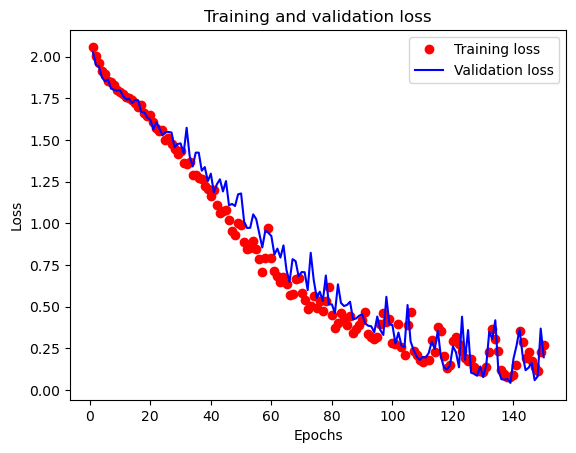

In [23]:
### loss plots using LSTM model
loss=history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len (loss) + 1)

plt.plot (epochs, loss, 'ro', label='Training loss')
plt.plot (epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

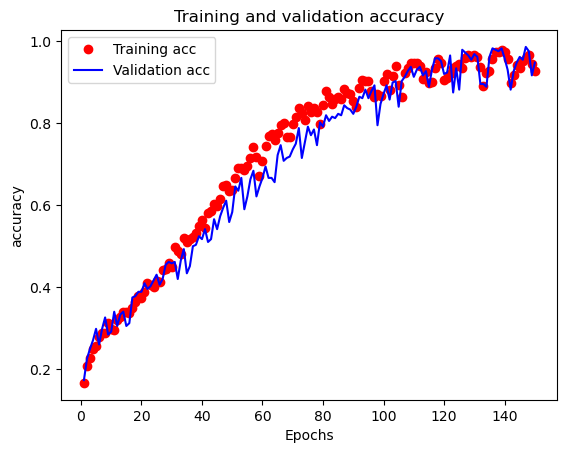

In [24]:
### accuracy plots using LSTM model
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot (epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel ('accuracy')
plt.legend ()

plt.show()

In [25]:
### evaluate using model A
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1),
                  labels_categorical[training_samples + validation_samples:])

9/9 [==============================] - 0s 16ms/step - loss: 0.1542 - accuracy: 0.9479


[0.15424422919750214, 0.9479166865348816]

In [37]:
emotions={1:'neutral',2:'sad',3:'angry',4:'fearful'}


def predict(wav_filepath):
  test_point=extract_mfcc(wav_filepath)
  test_point=np.reshape(test_point,newshape=(1,40,1))
  predictions=model_A.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])

In [27]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav')

C:\Users\dell\AppData\Local\Temp\ipykernel_21956\3485051273.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr =librosa.load(wav_file_name)
C:\Users\dell\anaconda3\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav'

In [22]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav')

1/1 [==============================] - 0s 38ms/step
neutral


In [23]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_11/03-01-01-01-01-02-11.wav')

1/1 [==============================] - 0s 23ms/step
calm


In [28]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_14/03-01-01-01-02-01-14.wav')

C:\Users\dell\AppData\Local\Temp\ipykernel_21956\3485051273.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr =librosa.load(wav_file_name)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_14/03-01-01-01-02-01-14.wav'

In [25]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_02/03-01-03-01-01-02-02.wav')

1/1 [==============================] - 0s 25ms/step
happy


In [26]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/Actor_23/03-01-04-02-01-01-23.wav')

1/1 [==============================] - 0s 23ms/step
sad


In [27]:
predict('/content/drive/MyDrive/T5/CUSTOM_DATASET/Speaker1/01_01_01_01_01.wav')

1/1 [==============================] - 0s 58ms/step
sad


In [28]:
model_A.save('test1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/WhatsApp Ptt 2024-01-30 at 1.05.52 PM.wav')

1/1 [==============================] - 0s 26ms/step
sad


In [30]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/WhatsApp Ptt 2024-01-30 at 1.24.15 PM (1).wav')

1/1 [==============================] - 0s 28ms/step
disgust


In [31]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/WhatsApp Ptt 2024-01-30 at 1.24.15 PM.wav')

1/1 [==============================] - 0s 32ms/step
disgust


In [32]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/WhatsApp Ptt 2024-01-30 at 1.25.31 PM.wav')

1/1 [==============================] - 0s 24ms/step
disgust


In [33]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/WhatsApp Ptt 2024-01-30 at 1.32.00 PM.wav')

1/1 [==============================] - 0s 28ms/step
calm


In [34]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/WhatsApp Ptt 2024-01-30 at 1.25.31 PM (1).wav')

1/1 [==============================] - 0s 28ms/step
disgust


In [35]:
predict('/content/drive/MyDrive/Colab Notebooks/ravdess-emotional-speech-audio/WhatsApp Ptt 2024-01-30 at 1.40.59 PM.wav')

1/1 [==============================] - 0s 35ms/step
sad


In [36]:
predict('/content/drive/MyDrive/T5/CUSTOM_DATASET/Speaker5/02_01_01_01_05.wav')

1/1 [==============================] - 0s 32ms/step
calm


In [29]:
predict('/content/drive/MyDrive/T5/CUSTOM_DATASET/Speaker2/01_01_00_02_02.wav')

C:\Users\dell\AppData\Local\Temp\ipykernel_21956\3485051273.py:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr =librosa.load(wav_file_name)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/T5/CUSTOM_DATASET/Speaker2/01_01_00_02_02.wav'

In [40]:
predict('/Users/dell/Desktop/new/sounds final/Civil/civil-20.wav')

1/1 [==============================] - 0s 32ms/step
sad


In [41]:
predict('/Users/dell/Desktop/new/sounds final/Civil/civil-21.wav')

1/1 [==============================] - 0s 39ms/step


KeyError: 7